In [1]:
import numpy as np                  
import  pandas as pd

from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network

In [2]:
#防止报错
warnings.filterwarnings('ignore')
#读取数据
voice = pd.read_csv('voice.csv')
#替换文本
le = preprocessing.LabelEncoder()               
voice["label"] = le.fit_transform(voice["label"])

voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)

train, test = train_test_split(voice, test_size=0.3) #7：3划分训练集和数据集

#使用所有的变量来训练
x_train = train.iloc[:,:-1]
y_train = train["label"]
x_test = test.iloc[:,:-1]
y_test = test["label"]

#只使用三个变量来训练
x_train1 = train[["meanfun","IQR","Q25","sd"]]
y_train1 = train["label"]
x_test1 = test[["meanfun","IQR","Q25","sd"]]
y_test1 = test["label"]

In [4]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=6))

In [10]:
def knn_correct(k,x_train,y_train,x_test,y_test):
    correct_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        correct_rate.append(np.mean(y_pred == y_test))
    kloc = correct_rate.index(max(correct_rate))
    print("Highest correct_rate is %s occurs at k=%s." % (correct_rate[kloc], K[kloc]))

    plt.plot(K, correct_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Correct Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Correct Rate')
    plt.show()
    return K[kloc]

Highest correct_rate is 0.9810725552050473 occurs at k=4.


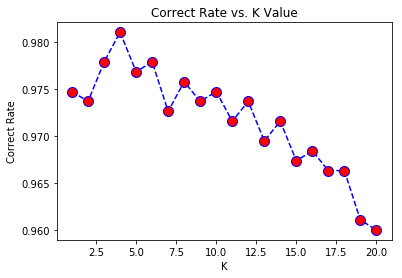

In [11]:
k=knn_correct(21,x_train,y_train,x_test,y_test)

In [12]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female   0.979210  0.983299  0.981250       479
       male   0.982979  0.978814  0.980892       472

avg / total   0.981080  0.981073  0.981072       951



In [13]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [14]:
def svm_correct(k,C,x_train,y_train,x_test,y_test):
    correct_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        correct_rate.append(np.mean(y_pred == y_test))
    cloc = correct_rate.index(max(correct_rate))
    print("Highest correct_rate is %s occurs at C=%s." % (correct_rate[cloc], C[cloc]))

    plt.plot(C, correct_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Correc Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Correct Rate')
    plt.show()
    return C[cloc]

In [15]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9688768606224628
rbf  out-of-sample accuracy in SVM:  0.964248159831756
poly  in-sample accuracy in SVM:  0.871447902571042
poly  out-of-sample accuracy in SVM:  0.8706624605678234
linear  in-sample accuracy in SVM:  0.9747406405051872
linear  out-of-sample accuracy in SVM:  0.9716088328075709
Highest accuracy is 0.9716088328075709 occurs at linear kernel.


Highest correct_rate is 0.9737118822292324 occurs at C=2.


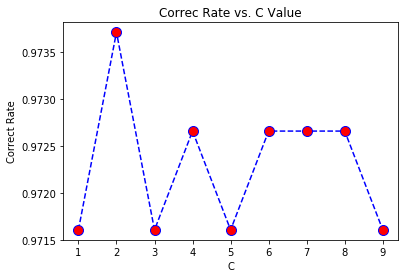

In [17]:
c=svm_correct(k,10,x_train,y_train,x_test,y_test)

In [18]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female   0.982979  0.964509  0.973656       479
       male   0.964657  0.983051  0.973767       472

avg / total   0.973885  0.973712  0.973711       951



In [19]:
#Find the best parameter to prune the tree
def dt_correct(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    correct_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        correct_rate.append(np.mean(y_pred == y_test))
    kloc = correct_rate.index(max(correct_rate))
    print("Highest correct_rate is %s occurs at n=%s." % (correct_rate[kloc], nodes[kloc]))
    plt.plot(nodes, correct_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Highest correct_rate is 0.9652996845425867 occurs at n=8.


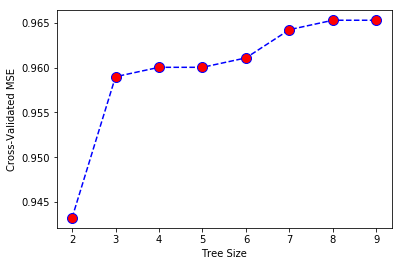

             precision    recall  f1-score   support

     female   0.986900  0.943633  0.964781       479
       male   0.945233  0.987288  0.965803       472

avg / total   0.966220  0.965300  0.965288       951



In [20]:
n=dt_correct(10,x_train,y_train,x_test,y_test)
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)